cropped_yale_SVM&KNN

## <center>Face Recognition<center>

### <center> PCA<center> 

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200).fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

s=pca.explained_variance_ratio_
cumulative_var = np.cumsum(s)
cumulative_var = cumulative_var/cumulative_var[-1]

In [10]:
cumulative_var

array([0.41483686, 0.55934758, 0.63362072, 0.65958962, 0.68151689,
       0.70158755, 0.71814097, 0.73384953, 0.74751963, 0.75960703,
       0.77013062, 0.77976494, 0.78846157, 0.79622925, 0.80354826,
       0.81039609, 0.81681578, 0.8226394 , 0.82813769, 0.83339517,
       0.83837774, 0.84301163, 0.84751785, 0.85184826, 0.85587341,
       0.85973499, 0.86329192, 0.86671061, 0.87007895, 0.87328207,
       0.87637918, 0.87934587, 0.88227991, 0.88503003, 0.88765096,
       0.89022427, 0.89268359, 0.89505961, 0.89740426, 0.89969614,
       0.90183323, 0.90394159, 0.90600614, 0.90799715, 0.90993427,
       0.91181751, 0.91363564, 0.91538994, 0.91708946, 0.91875881,
       0.92037765, 0.92196116, 0.9234939 , 0.92498814, 0.92645262,
       0.92790833, 0.92928879, 0.93064828, 0.93197063, 0.93328873,
       0.9345332 , 0.93574631, 0.93695455, 0.93813294, 0.93929131,
       0.94043074, 0.9415355 , 0.94259367, 0.94364667, 0.94467465,
       0.94568187, 0.94667197, 0.9476407 , 0.94858057, 0.94950

In [11]:
print(np.shape(x_train))
print(np.shape(x_train_pca))

(2169, 32256)
(2169, 200)


### <center> KNN<center> 

In [16]:
import time

neighbors = range(1,21)

# perform Test error 
test_error_knn = []
test_accu_knn = []
time_knn = []

for k in neighbors:
    start = time. time()
    knn = KNN(n_neighbors=k,p=2)
    knn.fit(x_train_pca, y_train)
    y_pred = knn.predict(x_test_pca)
    test_scores = 1 - accuracy_score(y_test, y_pred)
    test_error_knn.append(test_scores)
    test_accu_knn.append(1 - test_scores)
    end = time. time() 
    time_knn.append(end - start)
    
   
print("time for Plain KNN is",np.sum(time_knn)," seconds")

time for Plain KNN is 1.845461368560791  seconds


In [17]:
time_knn
a = pd.DataFrame(time_knn).T
a.columns = range(1,21)
round(a,4)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.0768,0.0809,0.0737,0.0784,0.0819,0.0866,0.0883,0.0901,0.092,0.0943,0.0952,0.0984,0.099,0.0972,0.1048,0.0989,0.1049,0.1007,0.101,0.1023


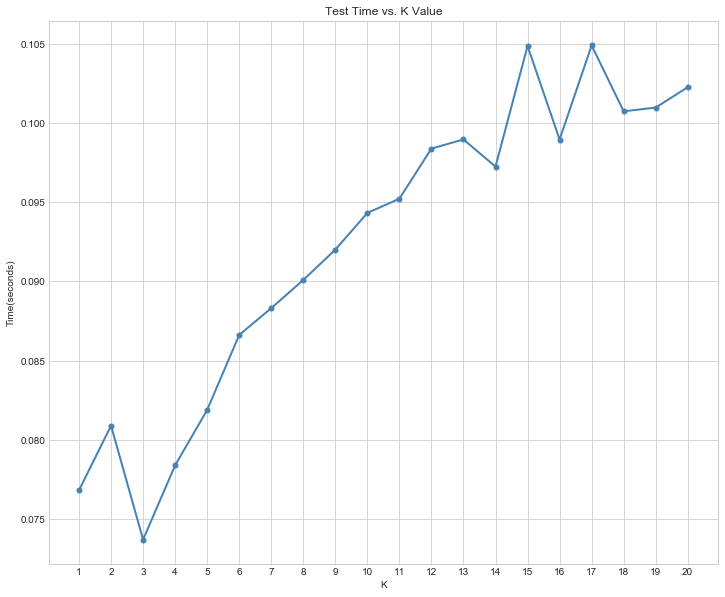

In [19]:
# plot
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.pyplot as plt
import mpld3

sns.set_style('whitegrid')
plt.xticks(neighbors)

mpld3.enable_notebook()
plt.rcParams['figure.figsize'] = [12,10]

# plot misclassification test error vs k
knn, = plt.plot(neighbors,time_knn,color='steelblue', linestyle='solid', linewidth = 2,marker='o',
         markerfacecolor='steelblue', markersize=5)

plt.title('Test Time vs. K Value')
plt.xlabel('K')
plt.ylabel('Time(seconds)')

plt.show()

In [20]:
test_accu_knn
test_knn = pd.DataFrame(test_accu_knn).T
test_knn.columns = range(1,21)
round(test_knn,4)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.8174,0.7801,0.8174,0.8091,0.8257,0.8257,0.834,0.8299,0.8548,0.834,0.8257,0.8257,0.8216,0.8133,0.805,0.8008,0.7967,0.7884,0.7801,0.7759


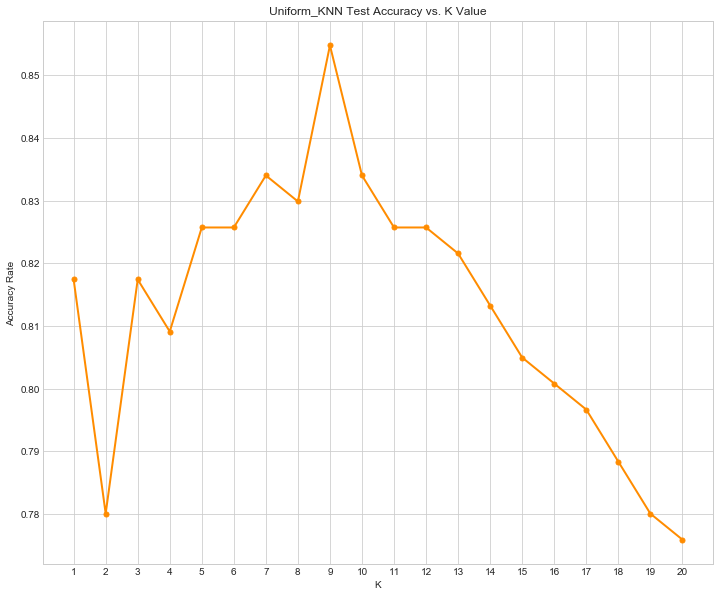

In [21]:
# plot
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.pyplot as plt
import mpld3

sns.set_style('whitegrid')
plt.xticks(neighbors)

mpld3.enable_notebook()
plt.rcParams['figure.figsize'] = [18,11]

# plot misclassification test error vs k
knn, = plt.plot(neighbors,test_accu_knn,color='darkorange', linestyle='solid', linewidth = 2,marker='o',
         markerfacecolor='darkorange', markersize=5)

plt.title('Uniform_KNN Test Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

plt.show()

### <center> Gaussian_Weighted KNN<center> 

In [7]:
optimal_gamma = 3.911880908825158e-05

In [8]:
# define gaussian weights
def gaussian_weight(x):
    power = -optimal_gamma * (x**2)
    weights= np.exp(power) 

In [10]:
import time

# perform Test error 
test_error_knngau = []
test_accu_knngau = []
time_knngau = []

neighbors = range(1,21)

for k in neighbors:
    start = time. time()
    knn = KNN(n_neighbors=k, weights=gaussian_weight)
    knn.fit(x_train_pca, y_train)
    y_pred = knn.predict(x_test_pca)
    test_scores = 1 - accuracy_score(y_test, y_pred)
    test_error_knngau.append(test_scores)
    test_accu_knngau.append(1 - test_scores)
    end = time. time() 
    time_knngau.append(end - start)
    
   
print("time for Gaussian_Weighted KNN is",np.sum(time_knngau)," seconds")

time for Gaussian_Weighted KNN is 1.8150672912597656  seconds


In [11]:
time_knngau
a = pd.DataFrame(time_knngau).T
a.columns = range(1,21)
round(a,4)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.0791,0.0726,0.0705,0.076,0.0792,0.0817,0.0887,0.1048,0.0926,0.0898,0.0932,0.0969,0.1035,0.0959,0.1013,0.0964,0.0977,0.0987,0.0988,0.0977


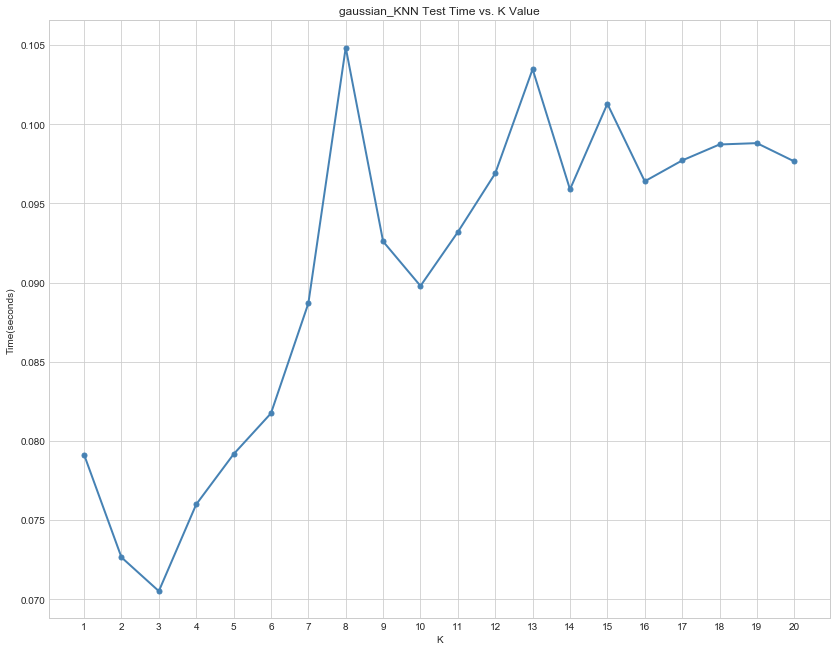

In [13]:
# plot
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.pyplot as plt
import mpld3

sns.set_style('whitegrid')
plt.xticks(neighbors)

mpld3.enable_notebook()
plt.rcParams['figure.figsize'] = [14,11]

# plot misclassification test error vs k
knn, = plt.plot(neighbors,time_knngau,color='steelblue', linestyle='solid', linewidth = 2,marker='o',
         markerfacecolor='steelblue', markersize=5)

plt.title('gaussian_KNN Test Time vs. K Value')
plt.xlabel('K')
plt.ylabel('Time(seconds)')

plt.show()

In [14]:
test_accu_knngau
test_knngau = pd.DataFrame(test_accu_knngau).T
test_knngau.columns = range(1,21)
round(test_knngau,4)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.8174,0.7801,0.8174,0.8091,0.8257,0.8257,0.834,0.8299,0.8548,0.834,0.8257,0.8257,0.8216,0.8133,0.805,0.8008,0.7967,0.7884,0.7801,0.7759


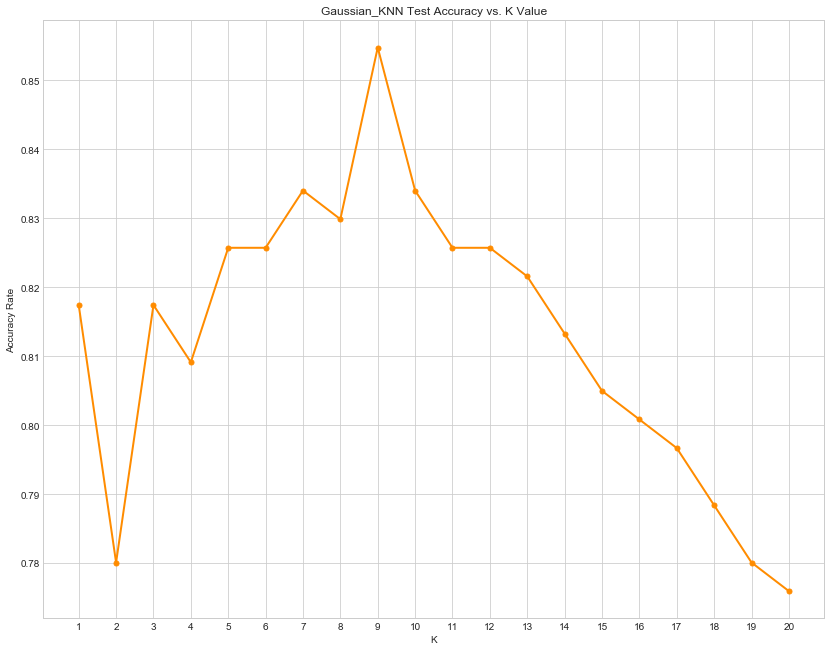

In [15]:
# plot
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.pyplot as plt
import mpld3

sns.set_style('whitegrid')
plt.xticks(neighbors)

mpld3.enable_notebook()
plt.rcParams['figure.figsize'] = [18,11]

# plot misclassification test error vs k
knn, = plt.plot(neighbors,test_accu_knngau,color='darkorange', linestyle='solid', linewidth = 2,marker='o',
         markerfacecolor='darkorange', markersize=5)

plt.title('Gaussian_KNN Test Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

plt.show()